In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.pyplot import figure
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

# Data Preparation

In [2]:
df = pd.read_csv("Homework8.csv")
df.head()

,Unnamed: 0,merchant,time,amount_usd_in_cents
0,1,faa029c6b0,2034-06-17 23:34:14,6349
1,2,ed7a7d91aa,2034-12-27 00:40:38,3854
2,3,5608f200cf,2034-04-30 01:29:42,789
3,4,15b1a0d61e,2034-09-16 01:06:23,4452
4,5,4770051790,2034-07-22 16:21:42,20203


In [3]:
# Let's drop de Unnamed:0 column
df.drop("Unnamed: 0", axis=1, inplace=True)
# Filter the data for the specified date range

df['time'] = pd.to_datetime(df['time'])

df.head()

,merchant,time,amount_usd_in_cents
0,faa029c6b0,2034-06-17 23:34:14,6349
1,ed7a7d91aa,2034-12-27 00:40:38,3854
2,5608f200cf,2034-04-30 01:29:42,789
3,15b1a0d61e,2034-09-16 01:06:23,4452
4,4770051790,2034-07-22 16:21:42,20203


In [4]:
# Filter transactions just to be between 2033,01,01 to 2035,01,01
start_date = '2033-01-01'
end_date = '2035-01-01'

# Filter the dataframe
df = df[(df['time'] >= start_date) & (df['time'] < end_date)]
df.head()

,merchant,time,amount_usd_in_cents
0,faa029c6b0,2034-06-17 23:34:14,6349
1,ed7a7d91aa,2034-12-27 00:40:38,3854
2,5608f200cf,2034-04-30 01:29:42,789
3,15b1a0d61e,2034-09-16 01:06:23,4452
4,4770051790,2034-07-22 16:21:42,20203


In [5]:
# Let's Make the 'time' column the index of the DataFrame
df.set_index('time', inplace=True)

df.head()

,merchant,amount_usd_in_cents
time,,
2034-06-17 23:34:14,faa029c6b0,6349
2034-12-27 00:40:38,ed7a7d91aa,3854
2034-04-30 01:29:42,5608f200cf,789
2034-09-16 01:06:23,15b1a0d61e,4452
2034-07-22 16:21:42,4770051790,20203


In [6]:
df.groupby('merchant').count()

,amount_usd_in_cents
merchant,
0002b63b92,1
0002d07bba,4
00057d4302,28
000bcff341,1
000ddbf0ca,1
...,...
ffd3e45675,5
ffe1f6b51a,53
ffe26b900d,81


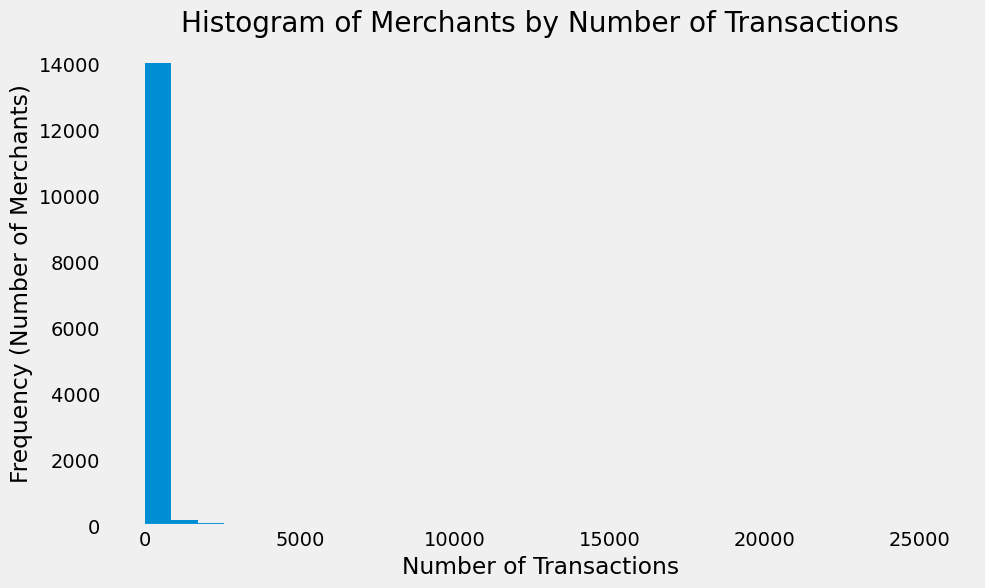

In [7]:
import matplotlib.pyplot as plt

# Count the number of transactions per merchant
merchant_counts = df['merchant'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
merchant_counts.hist(bins=30)  # You can adjust the number of bins for better visualization
plt.title('Histogram of Merchants by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency (Number of Merchants)')
plt.grid(False)  # Turn off the grid for better appearance
plt.show()

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df.describe()

,amount_usd_in_cents
count,1513719.00
mean,15484.66
std,61618.86
min,201.00
25%,3215.00
50%,6104.00
75%,12606.00
max,25920280.00


In [9]:
# Convert amount from cents to dollars
df['amount_usd'] = df['amount_usd_in_cents'] / 100

# Resample the data to get daily sums
daily_sums = df.resample('D')['amount_usd'].sum()

print(daily_sums.head(20))


time
2033-01-01      4415.40
2033-01-02      4758.62
2033-01-03      6283.53
2033-01-04      4851.11
2033-01-05     10016.21
2033-01-06     11055.98
2033-01-07     92925.77
2033-01-08     10977.77
2033-01-09      9100.92
2033-01-10     20481.44
2033-01-11    241898.77
2033-01-12   1210293.14
2033-01-13     34005.18
2033-01-14     41119.03
2033-01-15     15817.95
2033-01-16     11087.61
2033-01-17     18953.62
2033-01-18     19194.69
2033-01-19     32943.04
2033-01-20     18733.76
Freq: D, Name: amount_usd, dtype: float64


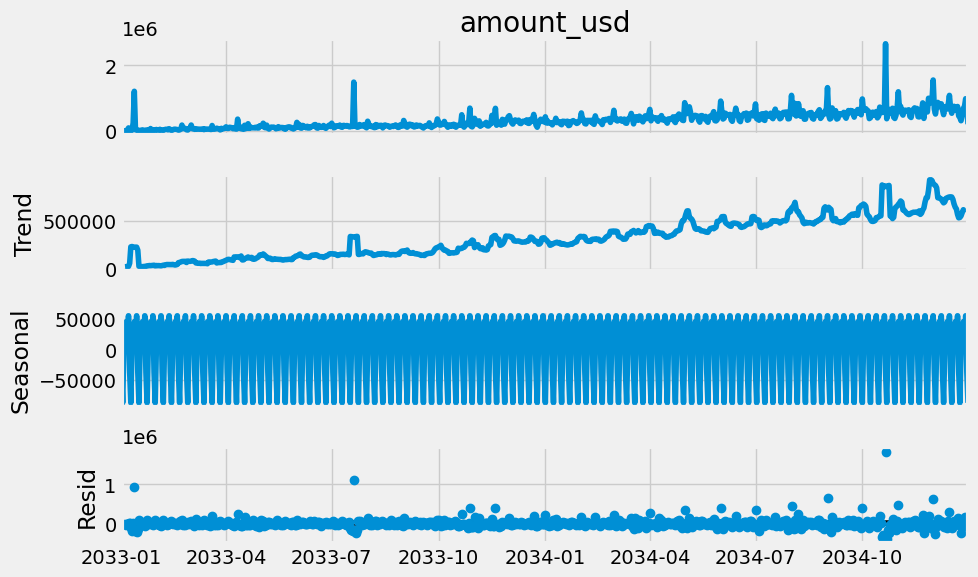

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

decomposition = sm.tsa.seasonal_decompose(daily_sums, model='additive')
fig = decomposition.plot()
plt.show()

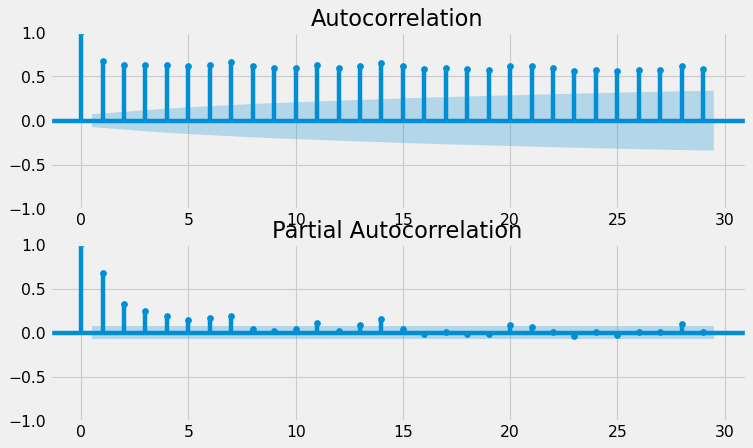

In [11]:
figure(figsize=(10, 6), dpi=80)
plt.subplot(211)
plot_acf(daily_sums, ax=plt.gca())
plt.subplot(212)
plot_pacf(daily_sums,method='ywm', ax=plt.gca())
plt.show()

# Forecasting Methods

In [12]:
## Apply Holt-Winters method to capture seasonality, trend, and level in the daily transaction data.

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 7 for weekly seasonality in daily data, 12 for monthly seasonality in monthly data, etc.
hw_model = ExponentialSmoothing(daily_sums, trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast future values 
forecast = hw_model.forecast(180) #This is to forecasdt 180 days

print(forecast)


2035-01-01   777920.89
2035-01-02   683576.81
2035-01-03   696064.36
2035-01-04   678108.40
2035-01-05   679213.33
                ...   
2035-06-25   864692.44
2035-06-26   877150.80
2035-06-27   849371.02
2035-06-28   881970.02
2035-06-29   868335.60
Freq: D, Length: 180, dtype: float64


D:\ComputerCode\JF_Environments\deep2-env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


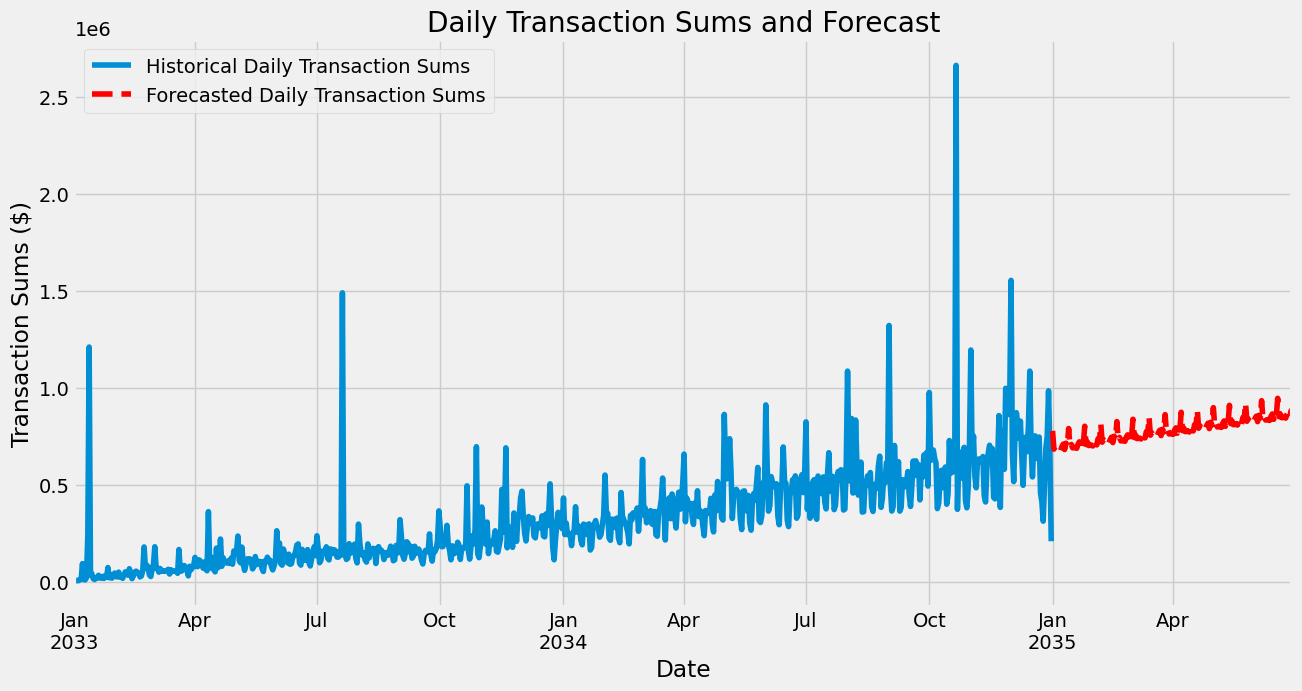

In [14]:
# Plot historical data
plt.figure(figsize=(14, 7))
daily_sums.plot(label='Historical Daily Transaction Sums')

# Plot forecasted data
forecast.plot(style='--', label='Forecasted Daily Transaction Sums', color='red')

# Adding titles and labels
plt.title('Daily Transaction Sums and Forecast')
plt.xlabel('Date')
plt.ylabel('Transaction Sums ($)')
plt.legend()
plt.show()


# Forecasting Models

## Prophet

In [15]:
from prophet import Prophet


# Reset index to get datetime into a column
daily_sums_prophet = daily_sums.reset_index()

# Rename columns for Prophet compatibility
daily_sums_prophet.columns = ['ds', 'y']


# Initialize and fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(daily_sums_prophet)

# Create a DataFrame to hold predictions
future = model_prophet.make_future_dataframe(periods=180)  
forecast_prophet = model_prophet.predict(future)

17:20:31 - cmdstanpy - INFO - Chain [1] start processing
17:20:32 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# Create lagged features, lag of 1 day, 2 days, and 7 days
for lag in [1, 2, 7]:
    daily_sums[f'lag_{lag}'] = daily_sums.shift(lag)


## Train Linear regression and Random Forest


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error


# Reset index to get datetime into a column
daily_sums2 = daily_sums.reset_index()

# Rename columns for compatibility
daily_sums2.columns = ['day', 'amount_usd']


# Ensure 'day' column is datetime
daily_sums2['day'] = pd.to_datetime(daily_sums2['day'], errors='coerce')

# Rename columns
daily_sums2.columns = ['day', 'amount_usd']

# Let's drop all NA's since we used lags
daily_sums2 = daily_sums2.dropna()

# Extract datetime features
daily_sums2['year'] = daily_sums2['day'].dt.year
daily_sums2['month'] = daily_sums2['day'].dt.month
daily_sums2['day_of_month'] = daily_sums2['day'].dt.day
daily_sums2['day_of_week'] = daily_sums2['day'].dt.dayofweek  # Monday=0, Sunday=6

# let's drop the original 'day' column as it's non-numeric
X = daily_sums2.drop(['day', 'amount_usd'], axis=1)
y = daily_sums2['amount_usd']

# Initialize time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor()

# Placeholder for MAPE scores
mape_scores = {'Linear Regression': [], 'Random Forest': []}

# Perform cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit and predict with Linear Regression
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    lr_mape = mean_absolute_percentage_error(y_test, lr_pred)
    mape_scores['Linear Regression'].append(lr_mape)
    
    # Fit and predict with Random Forest
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_mape = mean_absolute_percentage_error(y_test, rf_pred)
    mape_scores['Random Forest'].append(rf_mape)

# Calculating average MAPE scores
avg_mape_scores = {model: np.mean(scores) for model, scores in mape_scores.items()}

# Display average MAPE scores
for model, mape_score in avg_mape_scores.items():
    print(f"{model}: Average MAPE = {mape_score:.4f}")


Linear Regression: Average MAPE = 0.2152
Random Forest: Average MAPE = 0.2458


Text(0.5, 1.0, 'Prophet Forecast and Confidence Intervals')

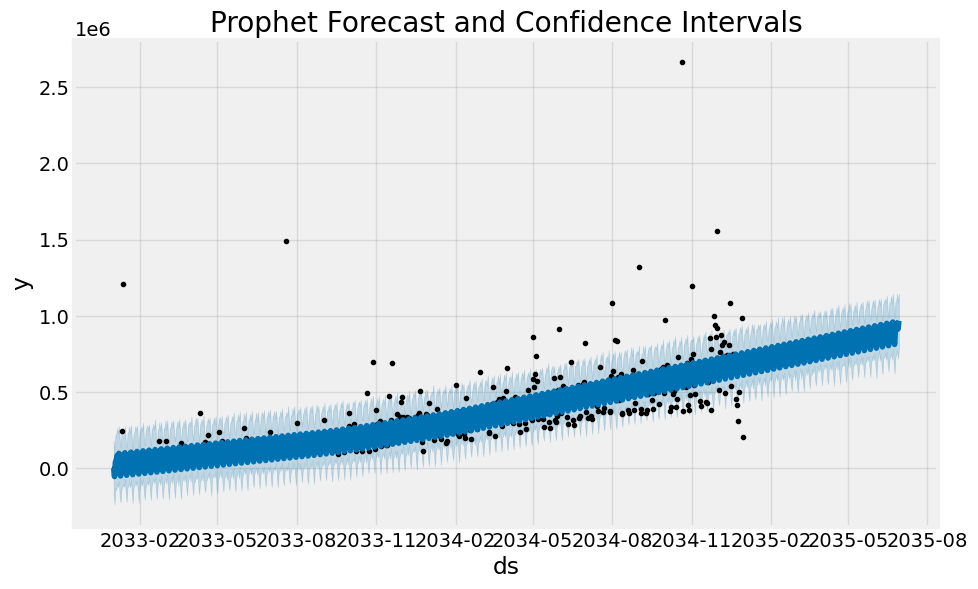

In [18]:
fig1 = model_prophet.plot(forecast_prophet)
plt.title('Prophet Forecast and Confidence Intervals')


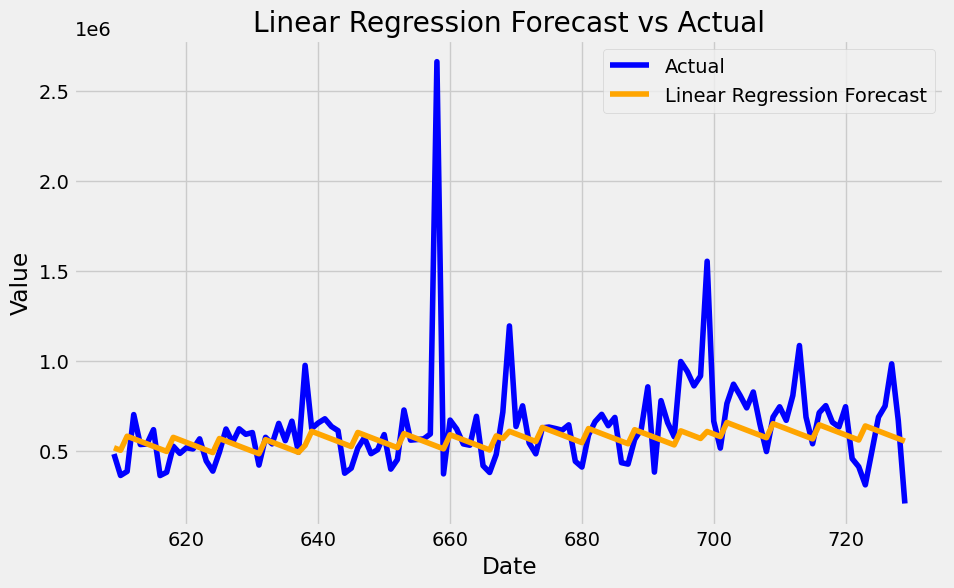

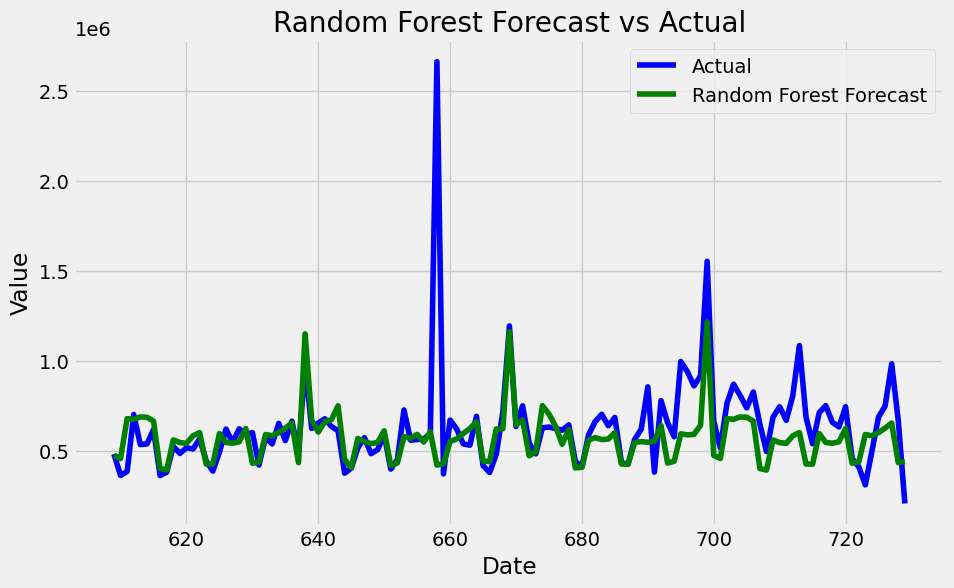

In [19]:

# Linear Regression Plot
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label='Actual', color='blue')
plt.plot(X_test.index, lr_pred, label='Linear Regression Forecast', color='orange')
plt.title('Linear Regression Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Random Forest Plot
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label='Actual', color='blue')
plt.plot(X_test.index, rf_pred, label='Random Forest Forecast', color='green')
plt.title('Random Forest Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


General Conclusions:

By looking at the plots of the forecast values, it would seem to me that PROPHET and Linear regresion seem that capture the general trend of the data.  I was expecting it from the linear model, but was surprised that Prophet would not capture the nuances of the fluctuations of the data which seem to be periodic.  This may be more likely due to my part not completely understanding how to setup Prophet.

The RANDOM FOREST model does seem to attempt to reflect periodic variations.


In [20]:
X

,year,month,day_of_month,day_of_week
0,2033,1,1,5
1,2033,1,2,6
2,2033,1,3,0
3,2033,1,4,1
4,2033,1,5,2
...,...,...,...,...
725,2034,12,27,2
726,2034,12,28,3
727,2034,12,29,4
728,2034,12,30,5


In [21]:
y

0       4415.40
1       4758.62
2       6283.53
3       4851.11
4      10016.21
         ...   
725   688573.47
726   750020.80
727   984672.08
728   668559.95
729   208533.08
Name: amount_usd, Length: 730, dtype: object

In [22]:
X2 = X.copy()
y2 = y.copy()

Epoch 1/20
583/583 [==============================] - 4s 2ms/step - loss: 0.5580
Epoch 2/20
583/583 [==============================] - 1s 2ms/step - loss: 0.4770
Epoch 3/20
583/583 [==============================] - 1s 2ms/step - loss: 0.4707
Epoch 4/20
583/583 [==============================] - 1s 2ms/step - loss: 0.4649
Epoch 5/20
583/583 [==============================] - 1s 2ms/step - loss: 0.4632
Epoch 6/20
583/583 [==============================] - 1s 2ms/step - loss: 0.4614
Epoch 7/20
583/583 [==============================] - 1s 2ms/step - loss: 0.4595
Epoch 8/20
583/583 [==============================] - 1s 2ms/step - loss: 0.4524
Epoch 9/20
583/583 [==============================] - 1s 2ms/step - loss: 0.4528
Epoch 10/20
583/583 [==============================] - 1s 2ms/step - loss: 0.4503
Epoch 11/20
583/583 [==============================] - 1s 2ms/step - loss: 0.4493
Epoch 12/20
583/583 [==============================] - 1s 2ms/step - loss: 0.4476
Epoch 13/20
583/583 [====

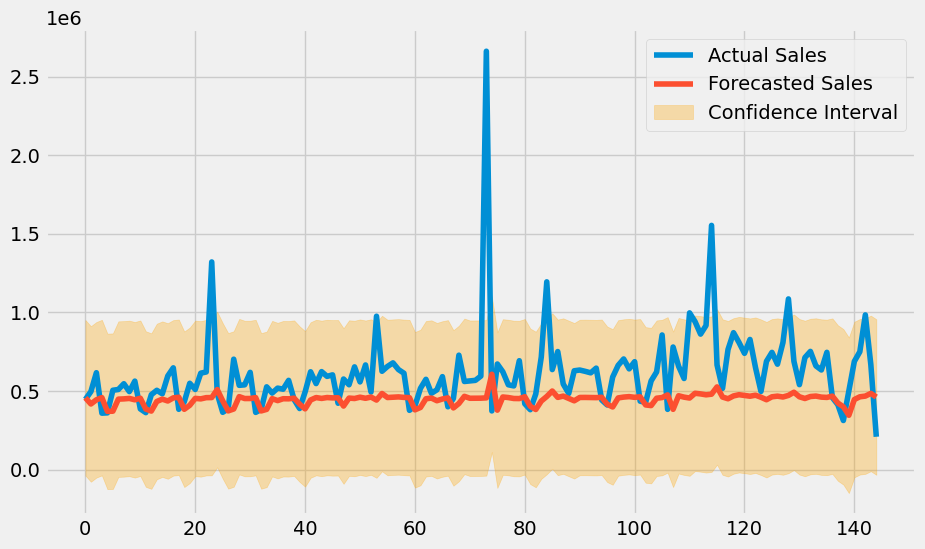

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_percentage_error

# Assuming X and y are already loaded as pandas DataFrames or Series
# X = ... # Your DataFrame with ['year', 'month', 'day_of_month', 'day_of_week']
# y = ... # Your Series with sales in dollars

# Assuming X is your DataFrame with ['year', 'month', 'day_of_month', 'day_of_week']
# Ensure that these column names match exactly what's in your DataFrame
X['date'] = pd.to_datetime(X.assign(day=X['day_of_month'])[['year', 'month', 'day']])
X = X.drop(['year', 'month', 'day_of_month', 'day_of_week'], axis=1)

# Assuming y is indexed in the same order as X
data = pd.concat([X, y], axis=1)
data.columns = ['date', 'sales']
data = data.sort_values('date')

# Creating train/test split without shuffling
test_size = 0.2
test_index = int(len(data)*(1-test_size))
train, test = data[:test_index], data[test_index:]

# Standardize features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[['sales']])
test_scaled = scaler.transform(test[['sales']])

# Preparing input for neural network
X_train, y_train = train_scaled[:-1], train_scaled[1:]
X_test, y_test = test_scaled[:-1], test_scaled[1:]

# Neural Network Model
model = Sequential([
    Dense(10, activation='relu', input_dim=1),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Training
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

# Forecasting
y_pred = model.predict(X_test)

# Calculating MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape}")

# Plotting
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

std_dev = np.std(y_test_inv - y_pred_inv)
upper_bound = y_pred_inv + 2 * std_dev
lower_bound = y_pred_inv - 2 * std_dev

plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Sales')
plt.plot(y_pred_inv, label='Forecasted Sales')
plt.fill_between(range(len(y_pred_inv)), lower_bound.flatten(), upper_bound.flatten(), color='orange', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.show()


Epoch 1/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 2/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 3/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 4/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 5/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 6/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 7/50
19/19 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 8/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 9/50
19/19 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 10/50
19/19 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 11/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 12/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 13/50
19/19 [==============================

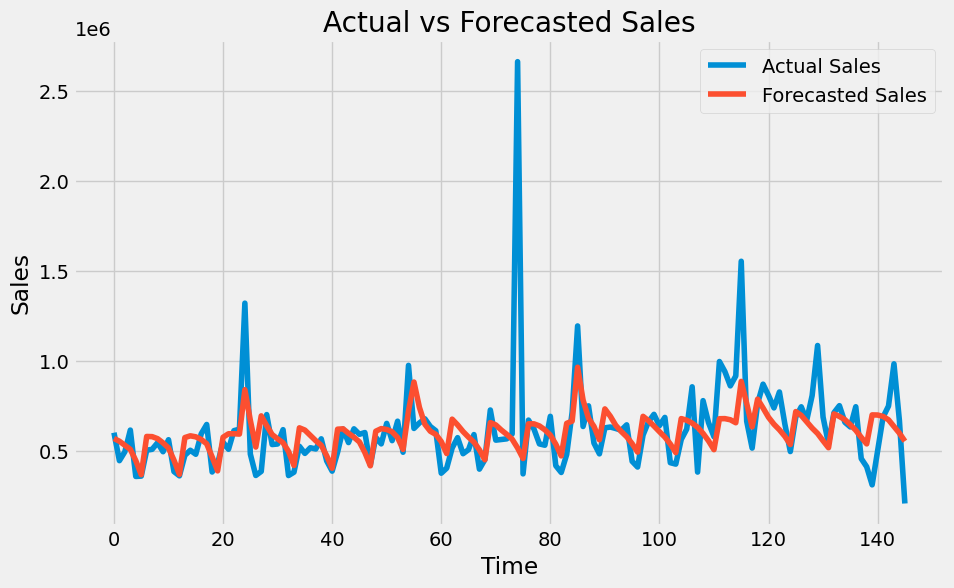

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Assuming X and y are already defined
# X = ... # Your DataFrame with ['year', 'month', 'day_of_month', 'day_of_week']
# y = ... # Your Series/DataFrame with sales in dollars

X = X2.copy()
y = y2.copy()

# Normalize the features
scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)

# Scale the target
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Train/test split
test_size = 0.2  # 20% of the data for testing
split_idx = int(len(X) * (1 - test_size))  # Calculate the split index
X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_test = y_scaled[:split_idx], y_scaled[split_idx:]

# Build the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and y_test for evaluation and plotting
predictions_inv = scaler_y.inverse_transform(predictions)
y_test_inv = scaler_y.inverse_transform(y_test)

# Evaluate the model
mape = mean_absolute_percentage_error(y_test_inv, predictions_inv)
print(f'MAPE: {mape}')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Sales')
plt.plot(predictions_inv, label='Forecasted Sales')
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


Epoch 1/100
19/19 [==============================] - 1s 7ms/step - loss: 0.0058
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 4/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 8/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 9/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 10/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 11/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 12/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 13/100
19/19 [=================

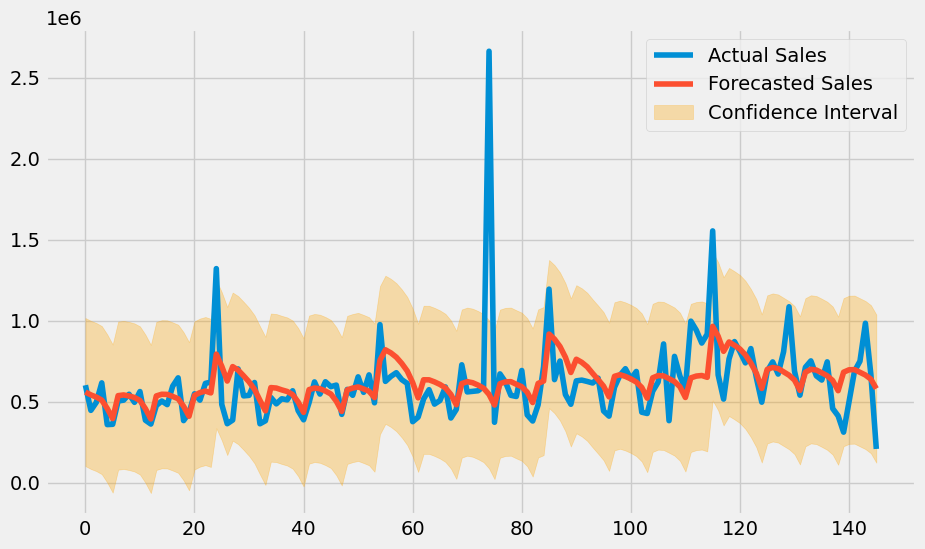

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Assuming X and y are already defined
# X = ... # DataFrame with ['year', 'month', 'day_of_month', 'day_of_week']
# y = ... # Series with sales in dollars

# Normalize the features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Reshape y to 2D array for scaling
y = y.values.reshape(-1, 1)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Splitting the data respecting the sequence (no shuffling)
split_index = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]

# Reshaping input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Building the LSTM Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Making predictions
y_pred_scaled = model.predict(X_test)

# Inverting the scaling
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred_scaled)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print(f"MAPE: {mape}")

# Plotting
std_dev = np.std(y_test_inv - y_pred_inv)
upper_bound = y_pred_inv + 2 * std_dev
lower_bound = y_pred_inv - 2 * std_dev

plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Sales')
plt.plot(y_pred_inv, label='Forecasted Sales')
plt.fill_between(range(len(y_pred_inv)), lower_bound.flatten(), upper_bound.flatten(), color='orange', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.show()


In [26]:
X2

,year,month,day_of_month,day_of_week
0,2033,1,1,5
1,2033,1,2,6
2,2033,1,3,0
3,2033,1,4,1
4,2033,1,5,2
...,...,...,...,...
725,2034,12,27,2
726,2034,12,28,3
727,2034,12,29,4
728,2034,12,30,5


In [27]:
X=X2.copy()
y=y2.copy()

D:\ComputerCode\JF_Environments\deep2-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\ComputerCode\JF_Environments\deep2-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAPE: 0.23813266514366194


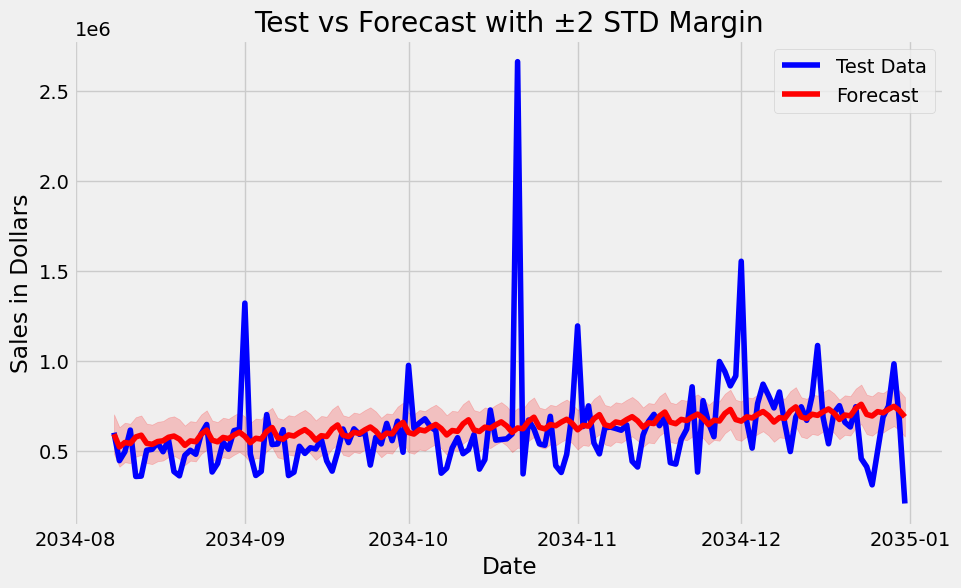

In [28]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Assuming X and y are already defined

# Convert to datetime and set as index
X['date'] = pd.to_datetime(dict(year=X['year'], month=X['month'], day=X['day_of_month']))
X.set_index('date', inplace=True)

# Assuming y is a Series with an implicit index that matches X's row order
y.index = X.index

# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Now, you can safely drop the original date-related and other unnecessary columns from data
data.drop(['year', 'month', 'day_of_month', 'day_of_week'], axis=1, inplace=True)

# Split data into training and test sets without shuffling
test_size = int(len(data) * 0.2)
train, test = data.iloc[:-test_size, :], data.iloc[-test_size:, :]

# Make sure the y values are numeric and handle any potential non-numeric entries
train_y = pd.to_numeric(train.iloc[:, -1], errors='coerce').fillna(0)
test_y = pd.to_numeric(test.iloc[:, -1], errors='coerce').fillna(0)

# Forecast using SARIMAX
model = SARIMAX(train_y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast
forecast = model_fit.forecast(steps=len(test_y))

# Calculate MAPE
mape = mean_absolute_percentage_error(test_y, forecast)
print(f'MAPE: {mape}')

# Plotting test and forecast data with margin of 2 std
std_dev = np.std(forecast)  # Calculate standard deviation of forecast
plt.figure(figsize=(10, 6))
plt.plot(test_y.index, test_y, label='Test Data', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.fill_between(forecast.index, (forecast-2*std_dev), (forecast+2*std_dev), color='red', alpha=0.2)
plt.legend()
plt.title('Test vs Forecast with ±2 STD Margin')
plt.xlabel('Date')
plt.ylabel('Sales in Dollars')
plt.show()


In [29]:
X=X2.copy()
y=y2.copy()

In [31]:
# Convert to datetime and set as index
X['date'] = pd.to_datetime(dict(year=X['year'], month=X['month'], day=X['day_of_month']))
X.set_index('date', inplace=True)

# Assuming y is a Series with an implicit index that matches X's row order
y.index = X.index

# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Now, you can safely drop the original date-related and other unnecessary columns from data
data.drop(['year', 'month', 'day_of_month', 'day_of_week'], axis=1, inplace=True)


In [33]:
y

date
2033-01-01     4415.40
2033-01-02     4758.62
2033-01-03     6283.53
2033-01-04     4851.11
2033-01-05    10016.21
                ...   
2034-12-27   688573.47
2034-12-28   750020.80
2034-12-29   984672.08
2034-12-30   668559.95
2034-12-31   208533.08
Name: amount_usd, Length: 730, dtype: object

In [35]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

def find_best_sarimax_params(time_series):
    # Split the dataset into training (first 80%) and testing (last 20%)
    train_size = int(len(time_series) * 0.8)
    train, test = time_series.iloc[:train_size], time_series.iloc[train_size:]
    
    # Auto SARIMAX model
    # auto_arima helps in identifying the best order (p,d,q) and seasonal_order (P,D,Q,m) parameters
    # stepwise_search=False to try all models instead of the stepwise approach can be more thorough but much slower
    # seasonal=True to enable seasonal components detection, adjust m for the seasonality period
    # information_criterion='aic' to select best model based on AIC
    model = auto_arima(train, seasonal=True, m=12, stepwise=True, trace=True, error_action='ignore', suppress_warnings=True, information_criterion='aic')

    # Best model summary
    print(model.summary())

    # Return best order and seasonal_order
    return model.order, model.seasonal_order

# Assuming 'your_time_series_data' is your Pandas DataFrame with a DateTime index and a single numerical column
# Call the function like this:
# best_order, best_seasonal_order = find_best_sarimax_params(your_time_series_data)



In [36]:
find_best_sarimax_params(y)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=15530.150, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=15433.449, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=15266.581, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=15528.205, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=15265.014, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=15265.623, Time=0.13 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=15264.195, Time=0.09 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=15265.068, Time=0.25 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=15266.056, Time=0.24 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=15431.961, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=15260.693, Time=0.15 sec
 ARIMA(2,1,1)(1,0,0)[12

((0, 1, 2), (0, 0, 0, 12))

In [37]:
X=X2.copy()
y=y2.copy()

D:\ComputerCode\JF_Environments\deep2-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\ComputerCode\JF_Environments\deep2-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAPE: 0.23813266514366194


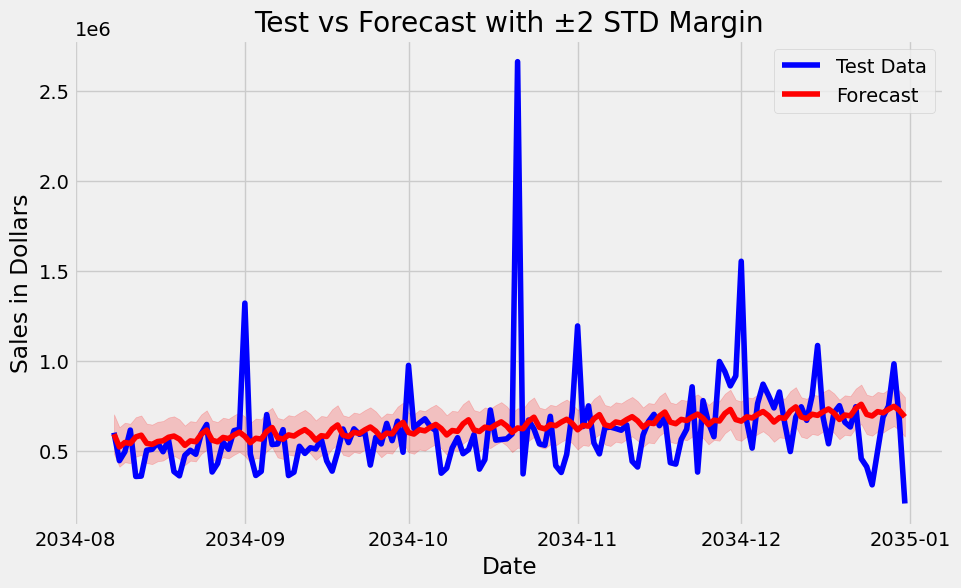

In [43]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Assuming X and y are already defined

# Convert to datetime and set as index
X['date'] = pd.to_datetime(dict(year=X['year'], month=X['month'], day=X['day_of_month']))
X.set_index('date', inplace=True)

# Assuming y is a Series with an implicit index that matches X's row order
y.index = X.index

# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Now, you can safely drop the original date-related and other unnecessary columns from data
data.drop(['year', 'month', 'day_of_month', 'day_of_week'], axis=1, inplace=True)

# Split data into training and test sets without shuffling
test_size = int(len(data) * 0.2)
train, test = data.iloc[:-test_size, :], data.iloc[-test_size:, :]

# Make sure the y values are numeric and handle any potential non-numeric entries
train_y = pd.to_numeric(train.iloc[:, -1], errors='coerce').fillna(0)
test_y = pd.to_numeric(test.iloc[:, -1], errors='coerce').fillna(0)

# Forecast using SARIMAX
model = SARIMAX(train_y, order=(1,1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast
forecast = model_fit.forecast(steps=len(test_y))

# Calculate MAPE
mape = mean_absolute_percentage_error(test_y, forecast)
print(f'MAPE: {mape}')

# Plotting test and forecast data with margin of 2 std
std_dev = np.std(forecast)  # Calculate standard deviation of forecast
plt.figure(figsize=(10, 6))
plt.plot(test_y.index, test_y, label='Test Data', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.fill_between(forecast.index, (forecast-2*std_dev), (forecast+2*std_dev), color='red', alpha=0.2)
plt.legend()
plt.title('Test vs Forecast with ±2 STD Margin')
plt.xlabel('Date')
plt.ylabel('Sales in Dollars')
plt.show()


<Axes: xlabel='date'>

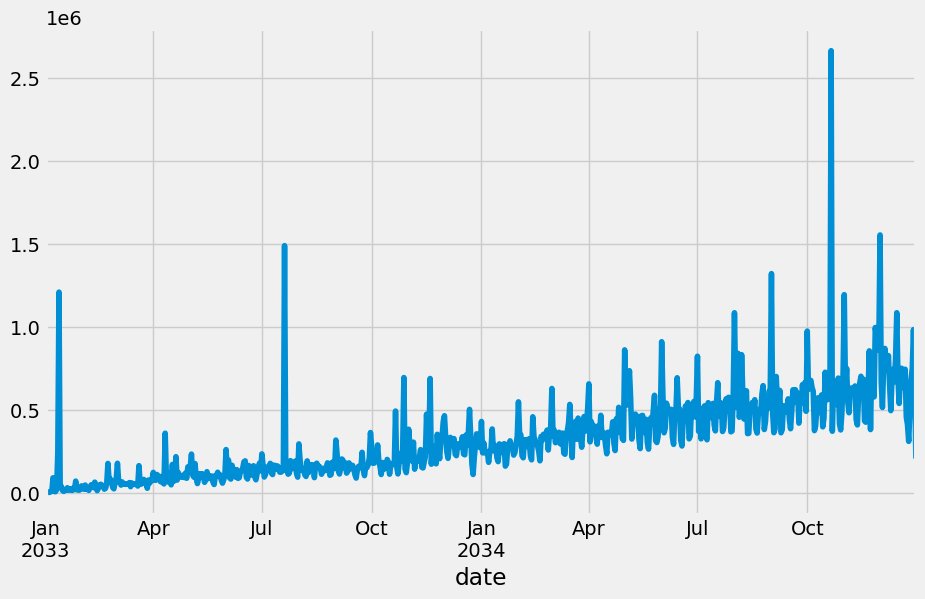

In [39]:
y.plot()

In [40]:
data

,amount_usd
date,
2033-01-01,4415.40
2033-01-02,4758.62
2033-01-03,6283.53
2033-01-04,4851.11
2033-01-05,10016.21
...,...
2034-12-27,688573.47
2034-12-28,750020.80
2034-12-29,984672.08
